In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero. From:
    http://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''

    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)
    
    if start < midpoint < stop:
        # shifted index to match the data
        shift_index = np.hstack([
            np.linspace(0.0, midpoint, 128, endpoint=False),
            np.linspace(midpoint, 1.0, 129, endpoint=True)
        ])
    elif midpoint >=stop:
        shift_index = np.hstack([
            np.linspace(0.0, midpoint, 128, endpoint=False),
            np.linspace(midpoint, midpoint, 129, endpoint=True)])
    
    elif midpoint <=start:
        shift_index = np.linspace(midpoint, stop, 257)
    else:
        pass

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = mpl.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

0.5099 0.51 1.0


<matplotlib.colorbar.Colorbar instance at 0x11588d290>

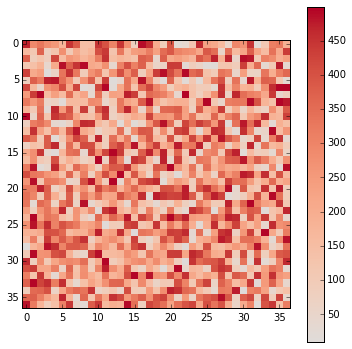

In [105]:
low, high = 10.0, 500.0 #-20, 2
biased_data = np.random.randint(high=high, low=low, size=(37,37))
start, midpoint, stop = 0, .5, 1.0


start, stop = 0.0, 1.0
if high > 0 and low >= 0:
    midpoint = 0.5 + low / (2 * high)
    start = midpoint - 0.0001
elif high <= 0 and low < 0:
    midpoint = (low - high) / (2 * low)
    stop = midpoint + 0.0001
elif abs(low) > high:
    stop = (high-low) / (2 * abs(low))
    midpoint = start + abs(low) / (2*abs(low))
elif abs(low) < high:
    start = (high - abs(low)) / (2 * high)
    midpoint = start + abs(low)/(2* high)
else:
    pass
        
print start, midpoint, stop
orig_cmap = mpl.cm.coolwarm
#shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.75, name='shifted')
shrunk_cmap = shiftedColorMap(orig_cmap, start=start, midpoint=midpoint, stop=stop, name='shrunk')

fig = plt.figure(figsize=(6,6))
plt.imshow(biased_data, interpolation="none", cmap=shrunk_cmap)
plt.colorbar()

In [83]:
crange/1000.0

0.5

In [45]:
help(np.random.random)

Help on built-in function random_sample:

random_sample(...)
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None``, in which
        case a single float is returned).
    
    Examples
    --------
    >>> np.random.random_sample()
    0.47108547995356098
    >>> type(np.random.random_sample())
    <type 'float'>
    >>> n

In [17]:
cmap = orig_cmap
print start, midpoint, stop

cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
        }

# regular index to compute the colors
reg_index = np.linspace(start, stop, 257)

shift_index = np.hstack([
            np.linspace(0.0, midpoint, 128, endpoint=False),
            np.linspace(midpoint, 1.0, 129, endpoint=True)
        ])

for ri, si in zip(reg_index, shift_index):
    r, g, b, a = cmap(ri)

    cdict['red'].append((si, r, r))
    cdict['green'].append((si, g, g))
    cdict['blue'].append((si, b, b))
    cdict['alpha'].append((si, a, a))
    

0.0 1.0 1.0


In [22]:
orig_cmap.

256

In [12]:
zip(reg_index, shift_index)

[(0.0, 0.0),
 (0.00390625, 0.0078125),
 (0.0078125, 0.015625),
 (0.01171875, 0.0234375),
 (0.015625, 0.03125),
 (0.01953125, 0.0390625),
 (0.0234375, 0.046875),
 (0.02734375, 0.0546875),
 (0.03125, 0.0625),
 (0.03515625, 0.0703125),
 (0.0390625, 0.078125),
 (0.04296875, 0.0859375),
 (0.046875, 0.09375),
 (0.05078125, 0.1015625),
 (0.0546875, 0.109375),
 (0.05859375, 0.1171875),
 (0.0625, 0.125),
 (0.06640625, 0.1328125),
 (0.0703125, 0.140625),
 (0.07421875, 0.1484375),
 (0.078125, 0.15625),
 (0.08203125, 0.1640625),
 (0.0859375, 0.171875),
 (0.08984375, 0.1796875),
 (0.09375, 0.1875),
 (0.09765625, 0.1953125),
 (0.1015625, 0.203125),
 (0.10546875, 0.2109375),
 (0.109375, 0.21875),
 (0.11328125, 0.2265625),
 (0.1171875, 0.234375),
 (0.12109375, 0.2421875),
 (0.125, 0.25),
 (0.12890625, 0.2578125),
 (0.1328125, 0.265625),
 (0.13671875, 0.2734375),
 (0.140625, 0.28125),
 (0.14453125, 0.2890625),
 (0.1484375, 0.296875),
 (0.15234375, 0.3046875),
 (0.15625, 0.3125),
 (0.16015625, 0.3203125

In [62]:
shrunken_extent

0.6666666666666666